<a href="https://colab.research.google.com/github/che-sinebycos/fetal-health-prediction/blob/main/fetal_status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Fetal Health Classification:
> In this work, we use machine learning for the prediction of fetal health to prevent child and maternal mortality.

## PROJECT CONTENT:
* Data Analysis / Visualization
* Data Preprocessing 
* Correlation & Correlation Matrix
* Predictive Modeling 
* Confusion Matrix
* Precision and Recall
* Knowledge Discovery

## Goal:
> The goal of this project is to predict Fetal Health. We will use various Classification Algorithms to achieve the lowest prediction error.

## The **principle** of this challenge is: 
> Classify fetal health in order to prevent child and maternal mortality. In order to do so we get information about "fetal_health" which is classified by expert obstetricians into 3 classes as:

* Normal (class 1)
* Suspect (class 2)
* Pathological (class 3)

To do so, we will **analyze and visualize** the target column (fetal_health).

## Machine learning methods:
We have applied consolidated methodologies to identify the most suitable machine learning model for the task from a pool of candidate methodologies.
We have taken into consideration a pool of three state-of-the-art machine learning models, that are briefly reviewed in the following:
* **Logistic Regression (LR)**: It is the baseline model in this Kernel.

**NOTE: The key advantages of LR are its simplicity, the scalability to very large datasets and the interpretation it provides in terms of how unitary changes in an input feature influence the log-odds of the associated linear parameter. **

* **K-nearest neighbors (KNN)**: K-Nearest Neighbor is a memory-based model, where predictions are performed by the similarity of the current sample to k nearest elements in the training set, according to the given distance metric. 

**NOTE: The key advantage of this method lies in its sheer simplicity, compensated by the difficulties in robustly determining the most appropriate similarity function as well as the choice of the k meta-parameter. **

* **Random Forest (RF)**: It is a type of ensemble methods in which multiple learning models are combined together to improve generalization.


The **rationale** behind this selection of candidate models was to provide reasonable coverage of different methodologies, to achieve the lowest prediction error.

## Import Necessary Libraries and Data Sets.

In [3]:
from subprocess import check_output

import warnings
warnings.simplefilter(action ="ignore")

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Import the necessary packages
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

In [4]:
# Load Dataset
data = pd.read_csv('fetal_health.csv') 

## Exploratory Data Analysis (EDA) and Analysis
In this step we want to get basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [5]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
#shape of dataset
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


**Observation**:
* there are 2126 data points with 22 features

nominal attributes


In [7]:
# Analyse statically insight of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Data visualizations of "fetal_health" column shows us the percentage of fetal health state

so , now we check the distribution of feature data and check if there are outliers or not.

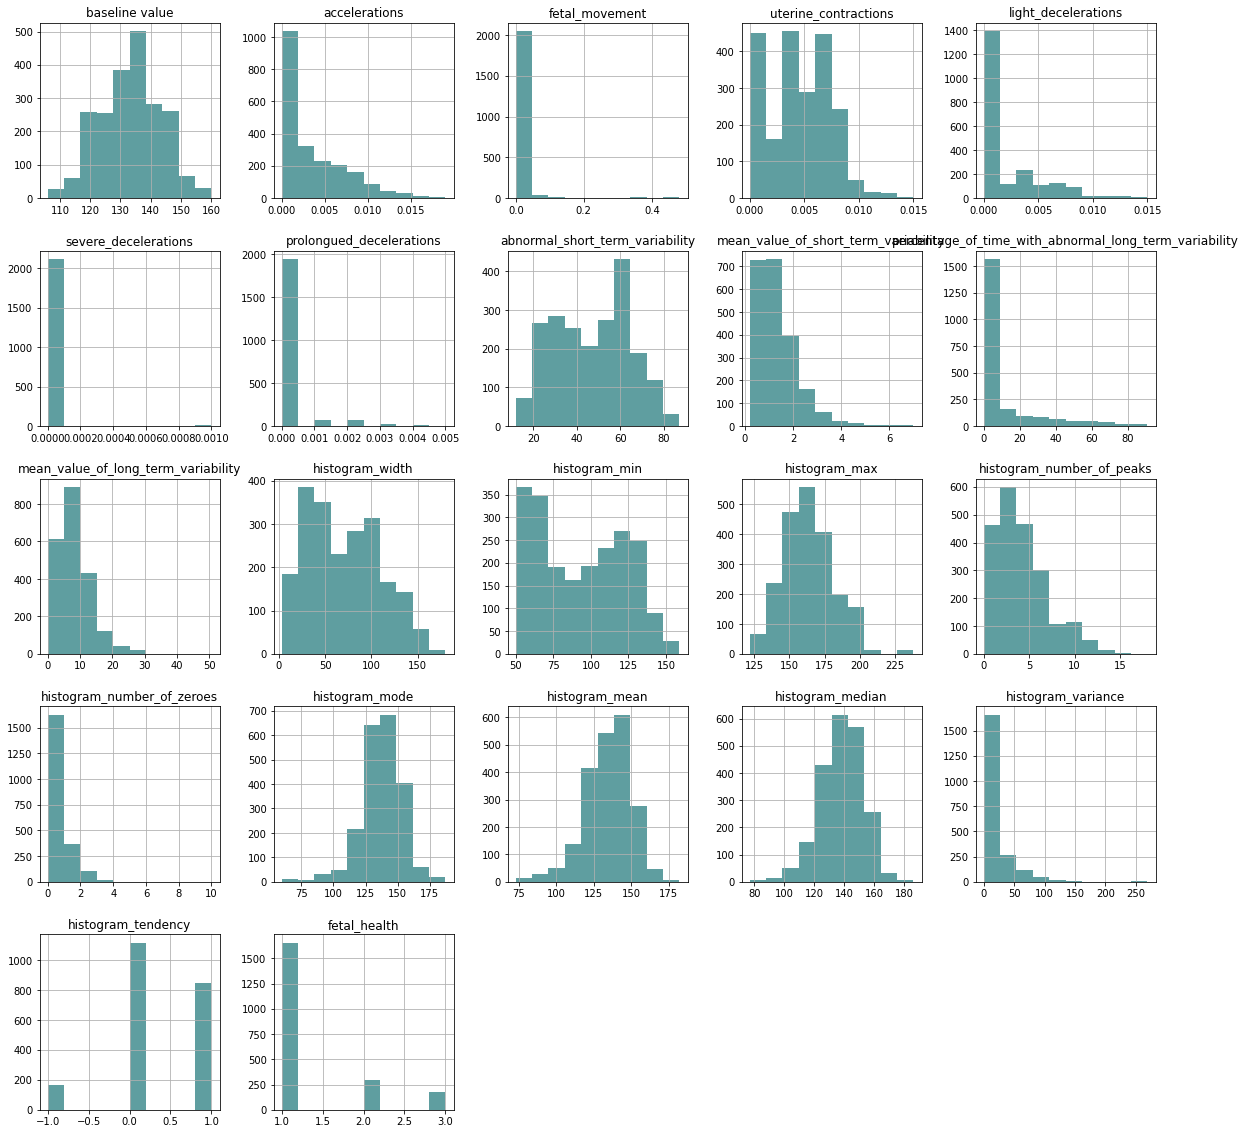

In [8]:
data_hist_plot = data.hist(figsize = (20,20), color = "#5F9EA0")

**Observation**
* target feature is nominal
* class 1 is majority class
* feature values do not belong to same range so it needs standardisation/normalisation
* there are no outliers

## Count the missing and null values
Here is good to count the **missing** and **null** values.
In the case of a real-world dataset, it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete. That’s why we use some imputation techniques to replace the NaN values with some probable values.

In [9]:
# Count the missing and null values for dataset fetal healt.
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


**Observation**
* In this case, there is *neither null values nor missing values* in the dataset.

## Correlation Numeric features with output variable(fetal_health)
*Correlation & Correlation Matrix*

Here, we want to show the correlation between numerical features and the target "fetal_health", in order to have a first idea of the connections between features. Just by looking at the heatmap below we can see some features have the dark colors, Those features have high correlation with the target.

## Heatmap
> A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information. Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

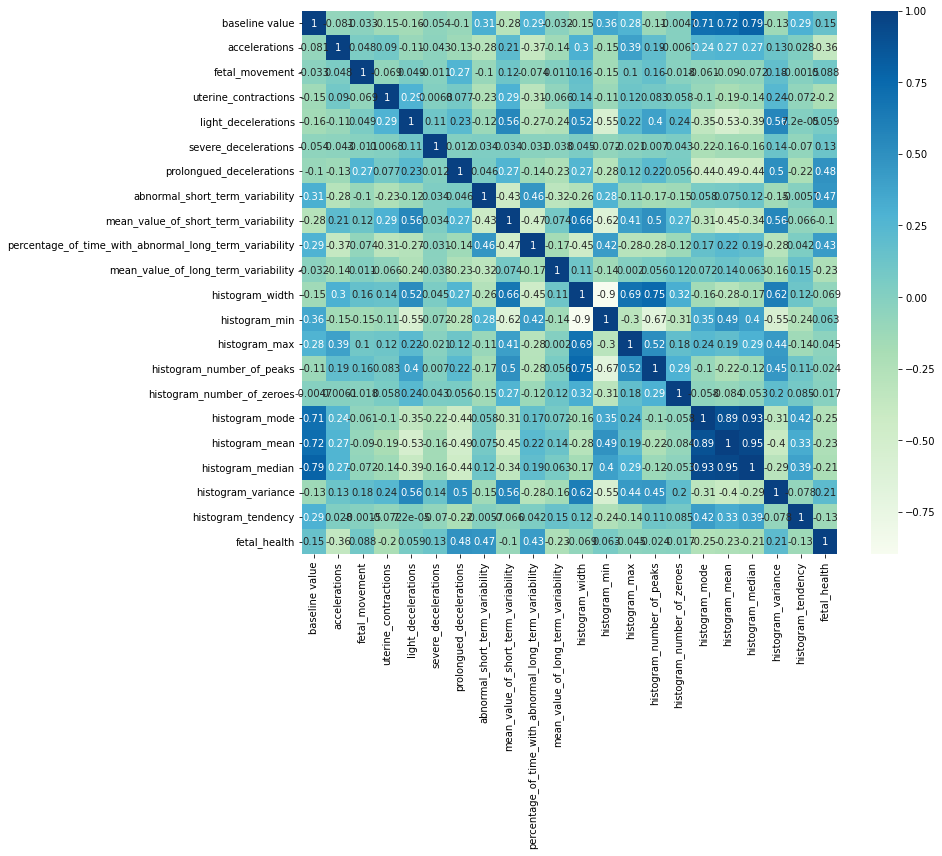

In [10]:
# Set the size of figure to 12 by 10.
plt.figure(figsize=(12,10))  

# Seaborn has very simple solution for heatmap
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")  

**Observations** : 
* We can see three features: "prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability" have high correlation with the target culumn (fetal_health)

* although histogram_median, histogram_mode and histogram_mean are highly correlated removing any of them didn't give us the good results. 

## Scaling the data
> Feature scaling in machine learning is one of the most critical steps during the pre-processing of data before creating a machine learning model. Scaling can make a difference between a weak machine learning model and a better one. The most common techniques of feature scaling are Normalization and Standardization. Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1, they make our data unitless. Refer to the below diagram, which shows how data looks after scaling in the X-Y plane.

![](https://pariaagharabi.github.io/images/fetal-health-image.png)



we are using StandardScaler() , which by default standardize features such that the mean is 0 and variance is 1 .

In [11]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [12]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [13]:
y = data["fetal_health"]
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

## Test Train Split and Cross Validation methods
* **Train Test Split** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.
* **Cross-validation**, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set.


In [14]:
# Importing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

## Building Machine Learning Models:
1. Logistic Regression (LR)
2. K-nearest neighbors (KNN)
3. Random Forest (RF)

NOTE: To improve all scores for each ML model, we want to search the set of "hyperparameters" by using the common approach "Grid search" for three models above. 
**Hyper-parameters** are a set of additional, model-dependent parameters that are not inferred automatically by the learning algorithm but need to be specified before the learning phase: a common example of **hyper-parameter** is the value of k in k-Nearest Neighbor or the number of hidden units in a Neural Network. 
Hence, finding sub-optimal values of the hyper-parameters is crucial to ensure proper generalization. *The hyper-parameter optimization procedure*, which was repeated separately for each candidate learning methodology, encompassed the following steps: 
* Firstly, a set of suitable hyper-parameters to optimize was identified; for each of them, a range of candidate values was specified. These choices are dependent both on our expertise and on the computational cost needed to train the models. 
* Secondly, a predictor was learned for all the possible combinations of hyper-parameters and its out-of-sample performance was estimated using 3-fold Cross Validation (CV), i.e. 
We trained the model with 70% of the total training set size and validated its performance in the remaining 30%. 

**GridSearch** exhaustively searches through all possible combinations of hyperparameters during training the phase. Before we proceed further, we shall cover another cross-validation (CV) methods since tuning hyperparameters via grid search is usually cross-validated to avoid overfitting.
Hence, For accelerating the running GridSearchCV we set: n-splits=3, n_jobs=2.

## Logistic Regression (LR)

In [16]:
# Baseline model of Logistic Regression with default parameters:

logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.893


In [17]:
cv_method = StratifiedKFold(n_splits=3 )

In [18]:
# Cross validate Logistic Regression model
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.90927419 0.89717742 0.88306452]
CrossValMeans: 0.897
CrossValStandard Deviation: 0.011


In [19]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
            }

* tol : Tolerance for stopping criteria.
* C : Inverse of regularization strength .smaller values specify stronger regularization.


In [20]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [21]:
# Fit model with train data
GridSearchCV_LR.fit(X_train, y_train);
best_estimator_LR = GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR model:\n{best_estimator_LR}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits
Best estimator for LR model:
LogisticRegression(C=10)


In [22]:
best_params_LR = GridSearchCV_LR.best_params_
print(f"Best parameter values for LR model:\n{best_params_LR}")

Best parameter values for LR model:
{'C': 10, 'intercept_scaling': 1, 'tol': 0.0001}


In [23]:
print(f"Best score for LR model: {round(GridSearchCV_LR.best_score_, 3)}")

Best score for LR model: 0.899


In [24]:
# The grid search returns the following as the best parameter set
logistic_regression = linear_model.LogisticRegression(C=10, intercept_scaling=1, tol=0.0001, penalty="l2", solver="liblinear", random_state=42)
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
pred_logistic_regression = logistic_regression_mod.predict(X_test)

mse_logistic_regression = mean_squared_error(y_test, pred_logistic_regression)
rmse_logistic_regression = np.sqrt(mean_squared_error(y_test, pred_logistic_regression))
score_logistic_regression_train = logistic_regression_mod.score(X_train, y_train)
score_logistic_regression_test = logistic_regression_mod.score(X_test, y_test)

In [25]:
print(f"Mean Square Error for Logistic Regression = {round(mse_logistic_regression, 3)}")
print(f"Root Mean Square Error for Logistic Regression = {round(rmse_logistic_regression, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_logistic_regression_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_logistic_regression_test, 3)}")

Mean Square Error for Logistic Regression = 0.138
Root Mean Square Error for Logistic Regression = 0.371
R^2(coefficient of determination) on training set = 0.907
R^2(coefficient of determination) on testing set = 0.886


Based on the result above, after tuning our model (LR), We could boost the model just a little bit. So we keep going with other models.

## Model Performance Analysis

1.   List item

1.   List item
2.   List item


2.   List item



* **Classification Report:** Report which includes Precision, Recall and F1-Score.


1. **Precision** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

    Precision = TP/TP+FP

2. **Recall (Sensitivity)** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

    Recall = TP/TP+FN    

3. **F1 score** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

    F1 Score = 2(Recall Precision) / (Recall + Precision)

In [26]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       497
         2.0       0.60      0.66      0.63        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.89      0.89      0.89       638



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 29  58   1]
 [  4  12  37]]


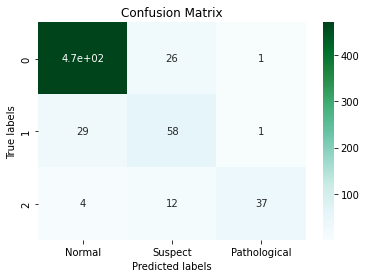

In [28]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## K-Nearest Neighbors (KNN)

In [29]:
# Baseline model of K-Nearest Neighbors with default parameters:

knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)


Baseline K-Nearest Neighbors: 0.878


### Here, we are going to tune the baseline model to boost the model.

In [30]:
# Cross validate K-Nearest Neighbors model
cv_method = StratifiedKFold(n_splits=3)

scores_knn = cross_val_score(knn, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for K-Nearest Neighbors model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_knn.std(), 3)}")

Scores(Cross validate) for K-Nearest Neighbors model:
[0.90927419 0.89717742 0.89717742]
CrossValMeans: 0.901
CrossValStandard Deviation: 0.006


In [31]:
params_knn = {"leaf_size": list(range(1,30)),
              "n_neighbors": list(range(1,21)),
              "p": [1,2]}

* leaf_size : maximum number of points a leaf can hold.
* n_neighbors : neighbors to be considered
* p = 1 means manhattan distance
* p = 2 means euclidean distance

In [32]:
GridSearchCV_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=params_knn, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=-1,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [33]:
# Fit model with train data
GridSearchCV_knn.fit(X_train, y_train);

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [34]:
best_estimator_knn = GridSearchCV_knn.best_estimator_
print(f"Best estimator for KNN model:\n{best_estimator_knn}")


Best estimator for KNN model:
KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)


In [35]:
best_params_knn = GridSearchCV_knn.best_params_
print(f"Best parameter values:\n{best_params_knn}")

Best parameter values:
{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}


In [36]:
# Test with new parameter for KNN model
knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3 , p=1)
knn_mod = knn.fit(X_train, y_train)
pred_knn = knn_mod.predict(X_test)

mse_knn = mean_squared_error(y_test, pred_knn)
rmse_knn = np.sqrt(mean_squared_error(y_test, pred_knn))
score_knn_train = knn_mod.score(X_train, y_train)
score_knn_test = knn_mod.score(X_test, y_test)

In [37]:
print(f"Mean Square Error for K_Nearest Neighbor  = {round(mse_knn, 3)}")
print(f"Root Mean Square Error for K_Nearest Neighbor = {round(rmse_knn, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_knn_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_knn_test, 3)}")

Mean Square Error for K_Nearest Neighbor  = 0.132
Root Mean Square Error for K_Nearest Neighbor = 0.363
R^2(coefficient of determination) on training set = 0.956
R^2(coefficient of determination) on testing set = 0.897


In [38]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       497
         2.0       0.66      0.66      0.66        88
         3.0       0.88      0.68      0.77        53

    accuracy                           0.90       638
   macro avg       0.83      0.77      0.79       638
weighted avg       0.90      0.90      0.89       638



In [39]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Confusion Matrix:
[[478  18   1]
 [ 26  58   4]
 [  5  12  36]]


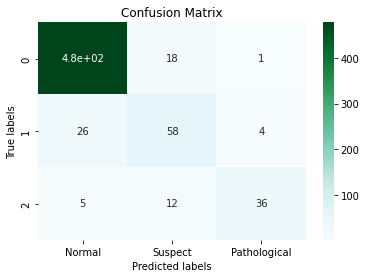

In [40]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## Random Forest (RF)

In [41]:
# Baseline model of RF with default parameters:

random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.925


In [42]:
# Cross validate Random forest model
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.9516129  0.9375     0.93951613]
CrossValMeans: 0.943
CrossValStandard Deviation: 0.006


In [43]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

* min_samples_split :The minimum number of samples required to split an internal node
* min_sample_leaf : The minimum number of samples required to be at a leaf node
* n_estimators : The number of trees in the forest.

In [44]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [45]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [46]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier()


In [47]:
best_params_RF = GridSearchCV_RF.best_params_
print(f"Best parameter values for RF model:\n{best_params_RF}")

Best parameter values for RF model:
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [48]:
best_score_RF = GridSearchCV_RF.best_score_
print(f"Best score for RF model: {round(best_score_RF, 3)}")

Best score for RF model: 0.946


In [49]:
random_forest = RandomForestClassifier(criterion="gini", n_estimators=100, min_samples_leaf=1, min_samples_split=2, random_state=42)
random_forest_mod = random_forest.fit(X_train, y_train)
pred_random_forest = random_forest_mod.predict(X_test)

mse_random_forest = mean_squared_error(y_test, pred_random_forest)
rmse_random_forest = np.sqrt(mean_squared_error(y_test, pred_random_forest))
score_random_forest_train = random_forest_mod.score(X_train, y_train)
score_random_forest_test = random_forest_mod.score(X_test, y_test)

In [50]:
print(f"Mean Square Error for Random Forest = {round(mse_random_forest, 3)}")
print(f"Root Mean Square Error for Random Forest = {round(rmse_random_forest, 3)}")
print(f"R^2(coefficient of determination) on training set = {round(score_random_forest_train, 3)}")
print(f"R^2(coefficient of determination) on testing set = {round(score_random_forest_test, 3)}")

Mean Square Error for Random Forest = 0.1
Root Mean Square Error for Random Forest = 0.317
R^2(coefficient of determination) on training set = 0.999
R^2(coefficient of determination) on testing set = 0.928


In [51]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.80      0.73      0.76        88
         3.0       0.87      0.87      0.87        53

    accuracy                           0.93       638
   macro avg       0.87      0.86      0.86       638
weighted avg       0.93      0.93      0.93       638



In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[482  11   4]
 [ 21  64   3]
 [  2   5  46]]


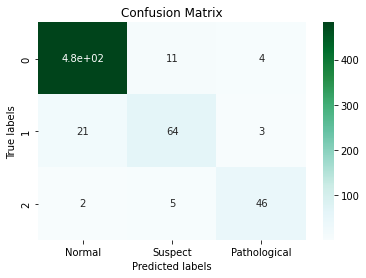

In [53]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## Plotting the learning curve
* Learning curves are plots that show changes in learning performance over time in terms of experience.
* Learning curves of model performance on the train and validation datasets can be used to diagnose an underfit, overfit, or well-fit model.
* Learning curves of model performance can be used to diagnose whether the train or validation datasets are not relatively representative of the problem domain.

In [54]:
# Plot learning curve
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="#80CBC4",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="#00897B",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Result Visualisation of the learning curve

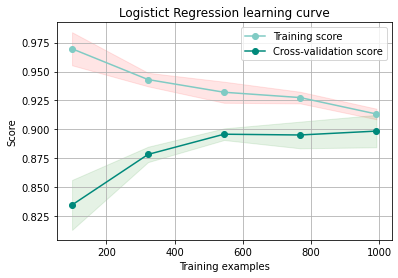

In [55]:
# Logistic Regression
plot_learning_curve(GridSearchCV_LR.best_estimator_,title = "Logistict Regression learning curve", x = X_train, y = y_train, cv = cv_method);

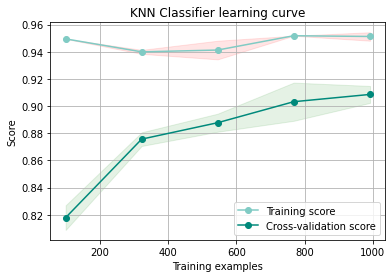

In [56]:
# knn
plot_learning_curve(GridSearchCV_knn.best_estimator_,title = "KNN Classifier learning curve", x = X_train, y = y_train, cv = cv_method);

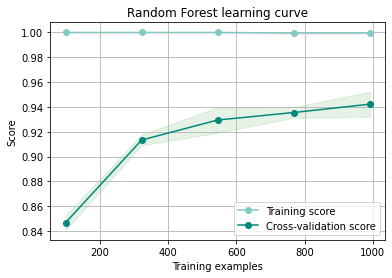

In [57]:
# Random forest
plot_learning_curve(GridSearchCV_RF.best_estimator_,title = "Random Forest learning curve", x = X_train, y = y_train, cv = cv_method);

In [58]:
results = pd.DataFrame({
                        "Model": ["Logistic Regression",
                                  "KNN",
                                  "Random Forest"],
                        "Score": [logistic_regression_mod.score(X_train, y_train),
                                  knn_mod.score(X_train, y_train),
                                  random_forest_mod.score(X_train, y_train)
                                 ]
                        })
result_df = results.sort_values(by="Score", ascending=False)
result_df = result_df.set_index("Score")
result_df.head(5)

,Model
Score,
0.999328,Random Forest
0.956317,KNN
0.906586,Logistic Regression


The results of the model selection phase are summarized in Table above. The Random Forest with 0.99 score has high percentage among models. Logistic Regression has lowest score (0.90).